## Homework 6 (ASTR8060)
#### Niana Mohammed
#### April 19 2021

In [1]:
# importing basic packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits as fits

### 1. Checking variation of PSF with time, airmass, & chip location
First, we want to see if the FWHM of one of the stars in the PG1633+099 Landolt standard field varies with observation time. Taking the star at approximate position (1251.64, 1221.43), three tests are done: (1) FWHM variation of this star in frames taken very close in time, (2) FWHM variation of the star in frames taken at different times throughout the night, & (3) the FWHM variation in frames of the same filter and exposure time, but taken at different times throughout the night.

Note: imexam was used to gather all FWHM and pixel positions used in this notebook.

In [2]:
import imexam
viewer=imexam.connect(path='/Volumes/Macintosh HD/Applications/SAOImageDS9.app/Contents/MacOS/ds9')
    

Ginga not installed, use other viewer, or no viewer


In [4]:
viewer.load_fits('reduced/a088otzf.fits')
viewer.scale()
viewer.imexam()


Press 'q' to quit

2 Make the next plot in a new window
a Aperture sum, with radius region_size 
b Return the 2D gauss fit center of the object
c Return column plot
d Return the Center of Mass fit center of the object
e Return a contour plot in a region around the cursor
g Return curve of growth plot
h Return a histogram in the region around the cursor
j 1D [Gaussian1D default] line fit 
k 1D [Gaussian1D default] column fit
l Return line plot
m Square region stats, in [region_size],default is median
r Return the radial profile plot
s Save current figure to disk as [plot_name]
t Make a fits image cutout using pointer location
w Display a surface plot around the cursor location
x Return x,y,value of pixel
y Return x,y,value of pixel
Current image /Users/mohamn4/Desktop/ASTR8060/reduced/a088otzf.fits


Text(0.5, 0, 'time(hr)')

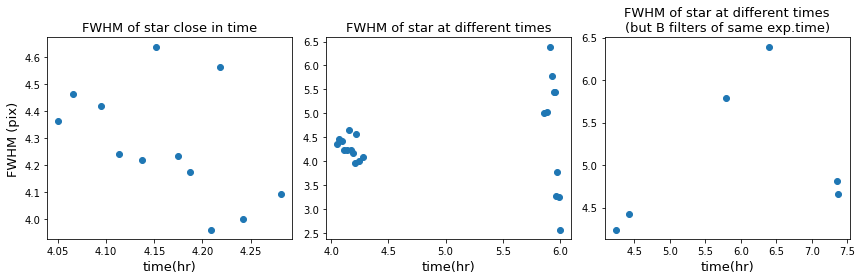

In [5]:
# FWHM list from frames taken close in time
fwhm_list = np.array([4.365,4.465,4.421,4.241,4.221,4.640,4.234,4.175,3.961,4.564,4.002,4.094])
# FWHM list from frames taken at different times
fwhm_list1=np.hstack([fwhm_list,[5.015,5.025,6.395,5.789,5.438,5.454,3.274,3.764,3.249,2.565]])
                
# FWHM list from frames of same filter (B) & exp.time, but taken at different times of night.
# (frames 83,84,132,133,204,205)
fwhm_list2 = np.array([4.421,4.241,6.395,5.789,4.810,4.665])

# gathering the paths to the frames
file_list = ['reduced/a0'+str(i)+'.fits' for i in np.arange(81,93,1)]#82,89,1
file_list1 = np.hstack([['reduced/a0'+str(i)+'.fits' for i in np.arange(81,93,1)],
                      ['reduced/a'+str(i)+'.fits' for i in np.arange(130,140,1)]])

# getting date and time from the headers
datetime = [fits.getheader(i)["DATE-OBS"] for i in file_list]
datetime1 = [fits.getheader(i)["DATE-OBS"] for i in file_list1]
datetime2 = [fits.getheader('reduced/a204.fits')["DATE-OBS"],
             fits.getheader('reduced/a205.fits')["DATE-OBS"]]

# remove the date part from datetime
time = [i[11:] for i in datetime]
time1 = [i[11:] for i in datetime1]
time2 = [i[11:] for i in datetime2]

# function to convert time to hours
def hour(time_str):
    # get time in hours
    h, m, s = time_str.split(':')
    return int(h) + int(m)/60 +int(float(s))/3600

# convert time to hours
time_hrs = [hour(i) for i in time]
time_hrs1 = [hour(i) for i in time1]
time_hrs2 = [hour(i) for i in time2]
time_hrs2 = [fwhm_list[2],fwhm_list[3],fwhm_list1[14],fwhm_list1[15],time_hrs2[0],time_hrs2[1]]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
ax1.scatter(time_hrs,fwhm_list)
ax2.scatter(time_hrs1,fwhm_list1)
ax3.scatter(time_hrs2,fwhm_list2)
ax1.set_xlabel("time(hr)",fontsize=13)
ax1.set_ylabel("FWHM (pix)",fontsize=13)
ax1.set_title("FWHM of star close in time",fontsize=13)
ax2.set_xlabel("time(hr)",fontsize=13)
ax2.set_title("FWHM of star at different times",fontsize=13)
ax2.set_xlabel("time(hr)",fontsize=13)
ax3.set_title("FWHM of star at different times\n(but B filters of same exp.time)",fontsize=13)
ax3.set_xlabel("time(hr)",fontsize=13)


The point of doing all three checks is to isolate just the observation time and see how it affects the FWHM. Looking at the **first plot**, for the frames taken close in time, there is a non-negligible variation but no real trend to suggest that observation time is the cause. In the **second plot**, for the frames taken at different times of the night, we can see that the FWHM for the frames taken earlier in the night remains fairly consistent compared to those taken later in the night. There's a lot of variation at around 6hrs, which might be due to less stable atmospheric conditions at that time compared to earlier in the night. And in the **third plot**, we can see that keeping the filter and exposure time constant had little effect on the FWHM variation. Therefore, we can conclude that the FWHM is affected by atmospheric conditions throughout different times of the night.

Now let's check if the FWHM varies for different stars observed at similar times but different airmasses. To check this, we can take frames 202-211, which were taken at around the same time but have sightly varying airmasses. 

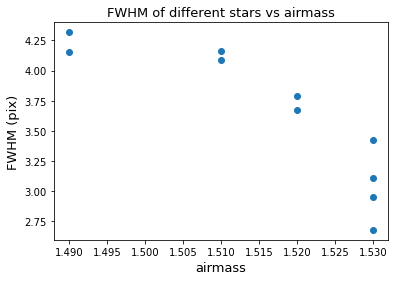

In [6]:
# FWHM list of different stars; one star per frame
fwhm = np.array([4.318,4.154,4.088,4.163,3.790,3.676,3.106,3.421,2.677,2.949])
# list of airmasses corresponding to the frames
x_list = np.array([1.49,1.49,1.51,1.51,1.52,1.52,1.53,1.53,1.53,1.53])

plt.scatter(x_list,fwhm)
plt.xlabel('airmass',fontsize=13)
plt.ylabel("FWHM (pix)",fontsize=13)
plt.title('FWHM of different stars vs airmass',fontsize=13)
plt.show()

It looks like the FWHM gets smaller with increasing airmass. This must mean that the higher the airmass, the dimmer the star gets and the smaller the PSF becomes. This goes to show, again, that the FWHM does depend on atmospheric conditions. 

Lastly, let's see if the FWHM varies for stars across the chip in a single exposure. We can look that the FWHM from stars in the same frame, but at different pixel positions.

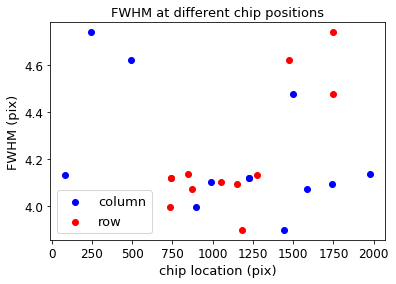

In [7]:
# FWHM of stars from frame a088.
fwhm_list2 = np.array([4.738,4.620,4.474,4.101,3.898,4.071,4.120,3.996,4.120,4.131,4.094,4.134])
# corresponding x and y chip locations
xc = np.array([245.1396,490.6837,1500.3965,987.0227,1442.0799,1584.8022,
               1224.1110,898.8852,1224.1110,85.4237,1742.3393,1975.5236])
yc = np.array([1745.7986,1470.9893,1744.8852,1049.2842,1182.0234,869.9200,
               742.1737,733.5628,742.1737,1274.6750,1149.0278,847.8918])

plt.scatter(xc,fwhm_list2,c='b',label='column')
plt.scatter(yc,fwhm_list2,c='r',label='row')
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("chip location (pix)",fontsize=13)
plt.ylabel("FWHM (pix)",fontsize=13)
plt.title("FWHM at different chip positions",fontsize=13)
plt.show()

It looks like there are a few high FWHM values near the edge of the chip. Therefore, FWHM is affected by chip position––the PSF gets bigger at the edge of the chip, and seems fine elsewhere. 

The point of these tests above is to see if it is reasonable to choose the same aperture for all our stars––because the general assumption is that the PSF is identical. So before we go make apertures that're all the same size, it's good to check what the FWHM depends on (FWHM is our characterization of what the PSF is; how spread out the light is). And based on the tests, it's probably safe to use the same FWHM (aperture) for stars in the same frame and for stars taken close in time with same airmass, since these were the cases with the least FWHM variation (refer to "FWHM of star close in time" and "FWHM at different chip positions" plots).

### 2. Testing the linearity of the CCD using the sequence of exposures labeled 'linearity test' in the log.
A linearity test is designed to see if with longer exposure times, we get more counts. So for this test, we'll use a bright star because there's a good chance of finding a pixel with the largest output (ADU) possible with the full 16-bits. No background subtraction is done because we want the raw response of the CCD. 

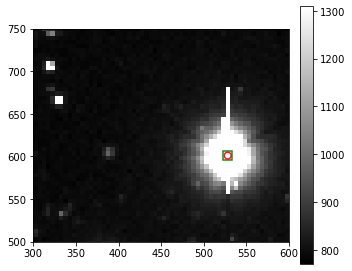

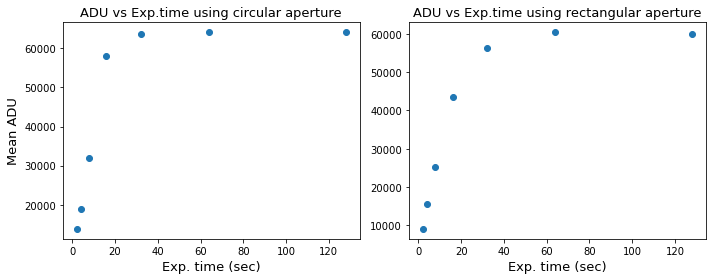

In [8]:
import sys
sys.path.insert(0,'./git_codes/ccd-reduction-and-photometry-guide/notebooks/')
from convenience_functions import show_image
from photutils.aperture import CircularAperture
from photutils.aperture import RectangularAperture
from photutils.aperture import aperture_photometry

# get the data from the linearity test files
data = [fits.open('reduced/a0'+str(i)+'otzf.fits')[0].data for i in np.arange(74,81,1)]

# approximate position of the star to make the measurements for.
# the star picked is one that's saturated in the longest exposure (look at image below)
position = [(528.0919, 601.0165)]
# make circular and rectangular apertures around that position
aperture = CircularAperture(position, r=4.)
aper_rect = RectangularAperture(position, 10., 10.)

# displaying the chosen star and the apertures
fig, axes = plt.subplots(1, 1, figsize=(5,5), tight_layout=True)
show_image(data[6], cmap='gray', ax=axes, fig=fig)
axes.set_xlim(300,600)
axes.set_ylim(500,750)
aperture.plot(color='r',lw=1.5,alpha=0.9) 
aper_rect.plot(color='g',lw=1.5,alpha=0.9)
plt.show()

# do aperture photometry to get the total counts within the apertures
apers = [aperture,aper_rect]
phot_tables = [aperture_photometry(i, apers) for i in data]

# find average counts of pixels within the circular and rectangular apertures.
averages = [phot_tables[i]['aperture_sum_0']/aperture.area for i in range(len(phot_tables))]
averages_rect = [phot_tables[i]['aperture_sum_1']/aper_rect.area for 
                 i in range(len(phot_tables))]

# list of the frames' exposure times
exptimes = np.array([2,4,8,16,32,64,128])

fig, axes = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
axes[0].scatter(exptimes,averages)
axes[1].scatter(exptimes,averages_rect)
axes[0].set_xlabel('Exp. time (sec)',fontsize=13)
axes[0].set_ylabel('Mean ADU',fontsize=13)
axes[1].set_xlabel('Exp. time (sec)',fontsize=13)
axes[0].set_title('ADU vs Exp.time using circular aperture',fontsize=13)
axes[1].set_title('ADU vs Exp.time using rectangular aperture',fontsize=13)
plt.show()

Both circular and rectangular apertures were used in case one of them gave lower counts or didn't get something closer to the full well depth. But from the plots, we can see that regardless of the aperture used, the CCD is not linear to the full 2^16 (or 65k) well depth. It is linear only at lower numbers of counts.

### 3. Using a really faint, medium bright, and bright stars from a PG1633+099 standard field frame to make the S/N vs aperture plot from Howell Figure 5.7.
Here, aperture photometry is performed on the stars using 5 aperture sizes. 

And the dark current is taken to be 0 for the SNR calculation because an estimate from a previous homework showed that it was small.

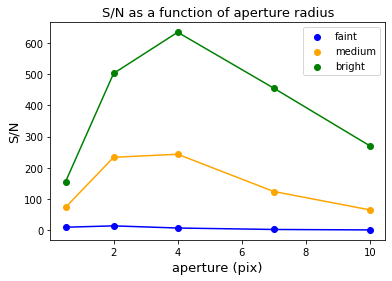

In [9]:
from photutils.aperture import CircularAnnulus

# list of apertures
ap_list = np.array([0.5,2,4,7,10])

# using a non-saturated frame
data1 = fits.open('reduced/a085otzf.fits')[0].data
# positions of faint, medium, and bright stars
positions = [(882.1783,1071.92523),(1044.8043,1043.2177),(1444.0142,1182.0363)]
# make apertures around these positions and do photometry
apertures = [CircularAperture(positions, r=i) for i in ap_list]
phot_table = aperture_photometry(data1, apertures)

# make an annulus around the small/faint star to get background
annulus_aperture = CircularAnnulus(positions[0], r_in=10., r_out=15.)
ann = [annulus_aperture]
phot = aperture_photometry(data1, ann)

# find total background counts within each aperture.
bkg_mean = phot['aperture_sum_0'] / annulus_aperture.area
bg_counts = [bkg_mean * apertures[i].area for i in range(len(apertures))]

# do background subtraction from total counts within the apertures around each star.
counts_s = [phot_table[0]['aperture_sum_'+str(i)]-bg_counts[i] for i in range(len(ap_list))]
counts_m = [phot_table[1]['aperture_sum_'+str(i)]-bg_counts[i] for i in range(len(ap_list))]
counts_l = [phot_table[2]['aperture_sum_'+str(i)]-bg_counts[i] for i in range(len(ap_list))]

# doing S/N calculation; taking npix as square of aperture values in ap_list
SNR_s = [counts/np.sqrt(counts+(ap_list[i]**2)*(bg_counts[i]+0+4.5**2)) 
         for i, counts in enumerate(counts_s)]
SNR_m = [counts/np.sqrt(counts+(ap_list[i]**2)*(bg_counts[i]+0+4.5**2)) 
         for i, counts in enumerate(counts_m)]
SNR_l = [counts/np.sqrt(counts+(ap_list[i]**2)*(bg_counts[i]+0+4.5**2)) 
         for i, counts in enumerate(counts_l)]


plt.scatter(ap_list,SNR_s,c='b',label='faint');plt.plot(ap_list,SNR_s,c='b')
plt.scatter(ap_list,SNR_m,c='orange',label='medium');plt.plot(ap_list,SNR_m,c='orange')
plt.scatter(ap_list,SNR_l,c='g',label='bright');plt.plot(ap_list,SNR_l,c='g')
plt.xlabel('aperture (pix)',fontsize=13)
plt.ylabel('S/N',fontsize=13)
plt.title('S/N as a function of aperture radius',fontsize=13)
plt.legend()
plt.show()

It looks like **4** is a good aperture size to use for this dataset, since that's where the bright and medium bright stars peak (it's hard to see where exactly the faint star peaks, but using 4 should be fine).

### 4. Identifying the standard stars in the PG1633+099 frame from Landolt (1992).
The stars were identified by visually comparing one of our PG1633+099 frames to the science image provided in Landolt (1992) with the standard stars marked clearly. Here, those 5 standard stars are marked and displayed. 

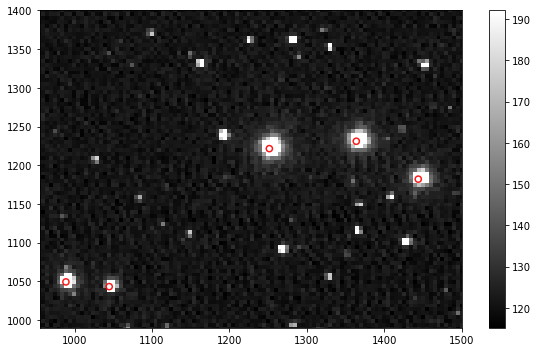

In [10]:
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

# estimating the background and background noise using sigma-clipped statistics
mean, median, std = sigma_clipped_stats(data1, sigma=3.0)

# use fwhm=4 based on conclusion from #3
daofind = DAOStarFinder(fwhm=4.0, threshold=5.*std)   

# subtract median background & find all the stars satisfying fwhm & threshold conditions
sources = daofind(data1-median) 

# get all star positions
p = np.transpose((sources['xcentroid'],sources['ycentroid']))

# pixel positions of the standard stars
xlist = np.array([990,1046,1252,1366,1444])
ylist = np.array([1050,1045,1221,1230,1182])

# find those stars from the list of positions in 'p'
index = []
for i in range(len(xlist)):
    idx = np.where((p[:,0]>(xlist[i]-5)) & (p[:,0]<(xlist[i]+5)) & 
                   (p[:,1]>(ylist[i]-5)) & (p[:,1]<(ylist[i]+5)))[0][0]
    index.append(idx)

pos = p[np.array(index)]
# make apertures just to mark them
ap = CircularAperture(pos, r=4.)

# displaying stars
fig, axes = plt.subplots(1, 1, figsize=(10,5), tight_layout=True)
show_image(data1, cmap='gray', ax=axes, fig=fig)
axes.set_xlim(955,1500)
axes.set_ylim(990,1400)
ap.plot(color='red', lw=1.5, alpha=0.9)

These are the same standard stars given in Landolt (1992).

### 5. Extracting instrumental magnitudes for all of the standard stars.

Based on what was done in problem 3, an aperture of 4 is used for the FWHM to gather stars from the science frames. But the FWHM for frames 237-245 is adjusted to 5, since 4 wasn't grabbing enough stars.

The frames from which the intrumental magnitudes are extracted were chosen to be used in problem 6, so not all PG1633+099 frames are used here. For instance, for the frames (81-90), only (81,83,85,87,89) each corresponding to (u,b,v,r,i) filters are used. And the instrumental magnitudes can be found in the 'mag' column resulting from implementing DAOStarFinder.

In [11]:
# getting data from the PG1633+099 frames taken throughout the night, 
# taking only one frame per filter.
frames = [81,83,85,87,89,130,132,134,136,138,202,204,206,208,210,237,239,241,243,245]

data3 = np.vstack([[fits.open('reduced/a0'+str(i)+'otzf.fits')[0].data for i in frames[0:5]],
        [fits.open('reduced/a'+str(i)+'otzf.fits')[0].data for i in frames[5:20]]])

# find all stars in each frame satisfying the fwhm & threshold conditions
mean_med_std = [sigma_clipped_stats(i, sigma=3.0) for i in data3]

daofind3 = [DAOStarFinder(fwhm=4.0, threshold=5.*mean_med_std[0:15][i][2]) for i in
            range(len(mean_med_std[0:15]))]
# using fwhm=5 just for the 237-245 frames.
daofind4 = [DAOStarFinder(fwhm=5.0, threshold=5.*mean_med_std[15:20][i][2]) for i in
            range(len(mean_med_std[15:20]))]
daofind5 = np.hstack([daofind3,daofind4])

sources3 = [daofind5[i](data3[i]-mean_med_std[i][1]) for i in range(len(mean_med_std))]

p3 = [np.transpose((sources3[i]['xcentroid'],sources3[i]['ycentroid'])) for i in 
      range(len(sources3))]

Finding the five standards in each of our frames and getting their magnitudes.

In [12]:
# function to find the standard stars
def indexing(ps,xs,ys):
    ind = [np.where((ps[:,0]>(xs[i]-5)) & (ps[:,0]<(xs[i]+5)) & 
        (ps[:,1]>(ys[i]-5)) & (ps[:,1]<(ys[i]+5)))[0][0] for i in range(len(xs))]
    return ind

# function to make indexing easier later on.
def indexer(ps,xs,ys,ranges):
    ind1 = []
    ind_all = []
    for i in ranges:
        for j in range(len(xs)):
            # implement 'indexing' function
            idx1 = indexing(ps[i],[xs[j]],[ys[j]])
            ind1.append(idx1)
            if len(ind1)==5:
                ind_all.append(ind1)
                ind1 = []
    return ind_all

# The pixel positions of the standard stars differ between the PG1633+099 frames 
# at fully different times of the night, but are similar in the frames taken close in time.
# '80' refers to the frames in the 80s, '130' to the frames in the 130s, and so on...
xlist_80, ylist_80 = np.array([990,1046,1252,1366,1444]),np.array([1050,1045,1221,1230,1182])
xlist_130,ylist_130 = np.array([933,989,1195,1308,1388]),np.array([1042,1036,1214,1224,1175])
xlist_200,ylist_200 = np.array([924,980,1187,1299,1379]),np.array([1036,1030,1208,1217,1168])
xlist_230,ylist_230 = np.array([837,892,1099,1211,1291]),np.array([1037,1031,1209,1219,1170])

# implementing function to find locate the standard stars in the chosen frames.
idx_80 = indexer(p3,xlist_80,ylist_80,np.arange(0,5,1))
idx_130 = indexer(p3,xlist_130,ylist_130,np.arange(5,10,1))
idx_200 = indexer(p3,xlist_200,ylist_200,np.arange(10,15,1))
idx_230 = indexer(p3,xlist_230,ylist_230,np.arange(15,20,1))

# extracting the instrumental magnitudes for the standard stars
inst_mags80 = [sources3[ele][np.array(idx_80[i])]['mag'] for i, 
               ele in enumerate(np.arange(0,5,1))]
inst_mags130 = [sources3[ele][np.array(idx_130[i])]['mag'] for i, 
                ele in enumerate(np.arange(5,10,1))]  
inst_mags200 = [sources3[ele][np.array(idx_200[i])]['mag'] for i,
                ele in enumerate(np.arange(10,15,1))]
inst_mags230 = [sources3[ele][np.array(idx_230[i])]['mag'] for i,
                ele in enumerate(np.arange(15,20,1))]

### 6. Plotting the standard star instrumental magnitudes versus their airmasses, and finding the extinction coefficients at each filter.
Here, the instrumental magnitudes from problem 5 are plotted as a function of airmass for each filter. Then using a least squares fit (np.polyfit, y=mx+b), the extinction coefficient (the slope m) is obtained for each filter. 

The extinction corrected magnitude $m_0$ is given by:
$$m_0=m-kx$$
where $m$ is the instrumental magnitude, $x$ is airmass, & $k$ is the extinction coefficient.

Note: I chose to use just the instrumental magnitudes instead of the difference between the accepted magnitudes and instrumental magnitudes, since I found during testing that taking the difference did not change the resulting extinction coefficients .

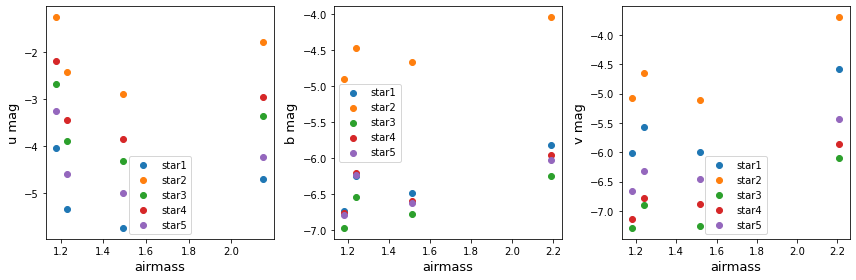

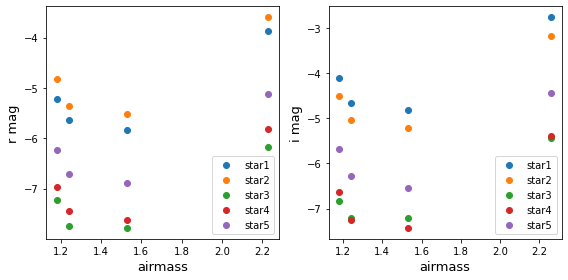

In [13]:
# listing the airmasses in order u,b,v,r,i; the corresponding frames are,
#(81,130,202,237),(83,132,204,239),(85,134,206,241),(87,136,208,243),(89,138,210,245)
airm = np.array([[1.18,1.23,1.49,2.15],[1.18,1.24,1.51,2.19],[1.18,1.24,1.52,2.21],
                 [1.18,1.24,1.53,2.23],[1.18,1.24,1.53,2.26]])

# arranging the magnitudes to match the airmass list order
mag_list = [np.hstack([inst_mags80[i],inst_mags130[i],inst_mags200[i],inst_mags230[i]]) 
            for i in np.arange(0,5,1)]

# plot instrumental mag vs airmass and find extinction coefficient in each filter
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
fig, (ax4,ax5) = plt.subplots(1, 2, figsize=(8,4), tight_layout=True)
a = [ax1,ax2,ax3,ax4,ax5]
# using small letters to denote instrumental magnitudes
filt = ['u','b','v','r','i']
k_list = []
for j in np.arange(0,5,1):
    for i in range(len(mag_list)):
        a[j].scatter(airm[j],mag_list[j][i], label='star'+str(i+1))
        a[j].set_xlabel('airmass',fontsize=13)
        a[j].set_ylabel(filt[j]+" mag",fontsize=13)
        a[j].legend(loc='best')
        # linear fit to find slope (extinction coefficient)
        m,b = np.polyfit(airm[j],mag_list[j][i],1)
        k_list.append(m)
plt.show()

In [14]:
# find the average extinction coefficient in each filter
five = []
avg_k = []
for i in k_list:
    five.append(i)
    if len(five)==5:
        avg_k.append(np.mean(five))
        five = []
print(avg_k)

[-0.10846380960791087, 0.6056432307118154, 1.1330321299226103, 1.384353725779415, 1.5048105758189174]


These extinction coefficients do not lie between k = 0.1-0.4 mag/airmass. This is probably due to some misstep in my data reduction (most likely overscan or bias subtraction) that ended up affecting the instrumental magnitude values. But these k values are small enough that, when later calibrating with the zero points and color terms, the zero points will probably get rid of the offsets in them.

### 7. Finding the instrumental zero points and first order color terms in each filter.
Here, we can take the difference between the real magnitudes and the extinction corrected instrumental magnitudes in each filter, and plot those as functions of V-R and B-V color. Then the instrumental zero points and first order color terms can be found by doing a least square fit just as in problem 6. 

The transformation to standard system $V$ is given by:
$$V=V_0+C_{0,v}+C_{1,v}(b-v)$$
where $V_0$ is the extinction corrected instrumental magnitude, $C_{0,v}$ is the zero point, $C_{1,v}$ is the 1st order color term, and $(b-v)$ is the difference between instrumental b and v magnitudes.

The instrumental zero points and the first order color terms allow us to transform our instrumental photometry to the standard system. 

In [15]:
# correcting the instrumental magnitudes for atmospheric extinction
m0 = []
corrected = []
for i in range(len(mag_list)):
    for j in np.arange(0,5,1):
        dif = mag_list[i][j]-avg_k[i]*airm[i] 
        corrected.append(list(dif))
        if len(corrected)==5:
            m0.append(np.array(corrected))
            corrected=[]

In [16]:
# gathering the real/standard magnitudes from Landolt (1992)
v_r = np.array([-0.093,0.505,0.590,0.618,0.324])
b_v = np.array([-0.192,0.873,1.081,1.134,0.535])

u_b = np.array([-0.974,0.320,1.007,1.138,-0.025])
r_i = np.array([-0.116,0.511,0.502,0.523,0.327])

Mv = np.array([14.397,15.256,12.969,13.229,13.691]) # standard V mag from Landolt
Mb = b_v+Mv
Mu = u_b+Mb
Mr = Mv-v_r
Mi = Mr-r_i

# taking the difference between the extinction corrected instrumental magnitudes
# and real magnitudes.
difference = []
diff = []
M = np.vstack([Mu,Mb,Mv,Mr,Mi])
for i in range(len(m0)):
    for j in np.arange(0,5,1):
        subtract = -m0[i][j]+M[i][j]
        difference.append(list(subtract))
        if len(difference)==5:
            diff.append(np.array(difference))
            difference=[]

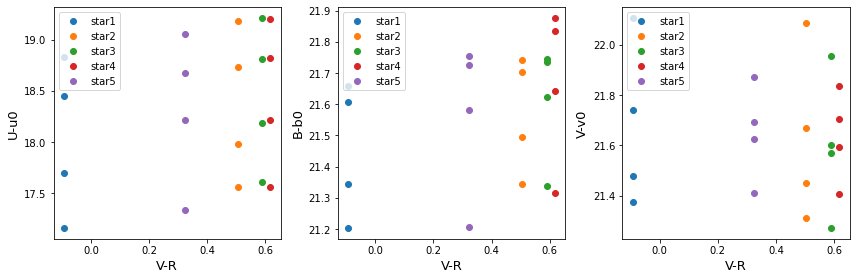

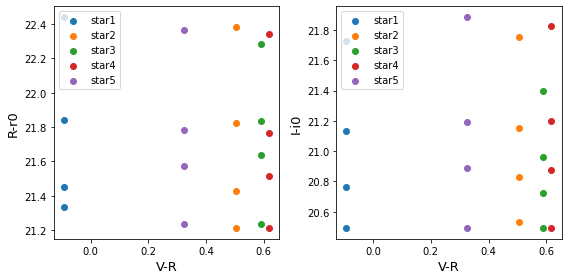

In [17]:
# plotting as a function of V_R COLOR and finding zero points & 1st order color terms
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
fig, (ax4,ax5) = plt.subplots(1, 2, figsize=(8,4), tight_layout=True)
a = [ax1,ax2,ax3,ax4,ax5]

# denoting difference between real mag and ext.corrected instrumental mag
filt = ['U-u0','B-b0','V-v0','R-r0','I-i0']
for j in range(len(diff)):
    for i in np.arange(0,5,1):
        a[j].scatter(np.full((1,4),v_r[i]),diff[j][i],label='star'+str(i+1))
        a[j].set_xlabel('V-R',fontsize=13)
        a[j].set_ylabel(filt[j],fontsize=13)
        a[j].legend(loc='best')
plt.show()

# finding zero points and 1st order color terms
c_list = []
z_point = []
for j in range(len(diff)):
    for k in np.arange(0,4,1):
        # least square fit to find zero point and first order color term
        m,b = np.polyfit(v_r,diff[j][:,k],1)
        c_list.append(m)
        z_point.append(b)

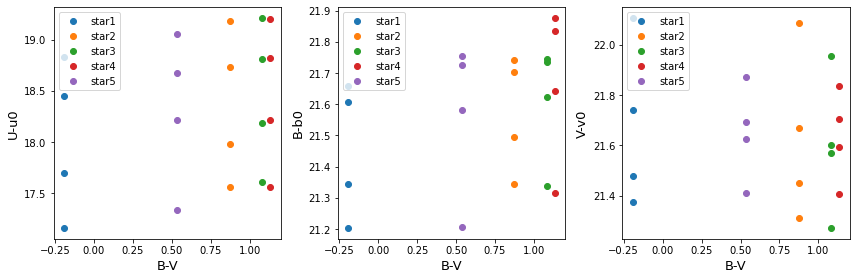

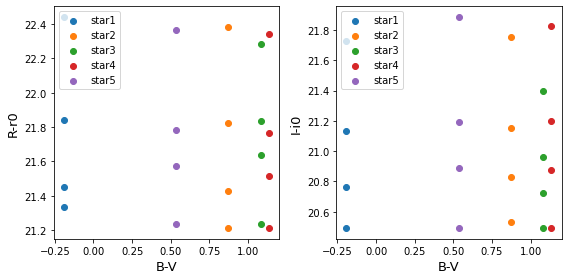

In [18]:
# plotting as a function of B_V COLOR and finding zero points & 1st order color terms
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
fig, (ax4,ax5) = plt.subplots(1, 2, figsize=(8,4), tight_layout=True)
a = [ax1,ax2,ax3,ax4,ax5]

filt = ['U-u0','B-b0','V-v0','R-r0','I-i0']
for j in range(len(diff)):
    for i in np.arange(0,5,1):
        a[j].scatter(np.full((1,4),b_v[i]),diff[j][i],label='star'+str(i+1))
        a[j].set_xlabel('B-V',fontsize=13)
        a[j].set_ylabel(filt[j],fontsize=13)
        a[j].legend(loc='best')
plt.show()

c1_list = []
z1_point = []
for j in range(len(diff)):
    for k in np.arange(0,4,1):
        m,b = np.polyfit(b_v,diff[j][:,k],1)
        c1_list.append(m)
        z1_point.append(b)

Now we can find the average zero points and first order color terms in each filter.

In [19]:
# finding average zero points and 1st order color terms using V_R COLOR
five = []
avg_c = []
for i in c_list:
    five.append(i)
    if len(five)==4:
        avg_c.append(np.mean(five))
        five = []
avg_z = []
for i in z_point:
    five.append(i)
    if len(five)==4:
        avg_z.append(np.mean(five))
        five = []

In [20]:
# finding average zero points and 1st order color terms using B_V COLOR
five = []
avg_c1 = []
for i in c1_list:
    five.append(i)
    if len(five)==4:
        avg_c1.append(np.mean(five))
        five = []
avg_z1 = []
for i in z1_point:
    five.append(i)
    if len(five)==4:
        avg_z1.append(np.mean(five))
        five = []

Here are the instrumental zero points and first order color terms for each band displayed in a table.

In [21]:
import pandas as pd
from IPython.display import display

my_df = pd.DataFrame({
    ' ': ['zero point (V_R color)','1st order (V_R color)','zero point (B_V color)',
          '1st order (B_V color)'],
    'U': [avg_z[0],avg_c[0],avg_z1[0],avg_c1[0]],'B': [avg_z[1],avg_c[1],avg_z1[1],avg_c1[1]],
    'V':  [avg_z[2],avg_c[2],avg_z1[2], avg_c1[2]],
    'R':  [avg_z[3],avg_c[3],avg_z1[3],avg_c1[3]],
    'I':  [avg_z[4],avg_c[4],avg_z1[4],avg_c1[4]]
},index=["A","B","C","D"])

df_reset=my_df.set_index(' ')
display(df_reset)

,U,B,V,R,I
,,,,,
zero point (V_R color),18.097145,21.475330,21.669882,21.759773,21.056297
1st order (V_R color),0.581858,0.253444,-0.081229,-0.063605,-0.039260
zero point (B_V color),18.109088,21.479794,21.668477,21.758023,21.058448
1st order (B_V color),0.312275,0.137095,-0.043977,-0.033488,-0.025379


Let's check if the zero points do indeed get rid of the offsets in the atmospheric extinction (k) values found in problem 6. We can use the zero points and 1st order color terms obtained using V-R color to find the standard/real magnitudes for the standard stars, and compare the result to the standard/real magnitudes obtained from Landolt (1992). 

In [22]:
standard = []
all_standards = []
for i in range(len(m0)):
    for j in np.arange(0,5,1):
        std = np.mean(m0[i][j]) + avg_z[i] + (avg_c[i])*v_r[j]
        standard.append(std)
        if len(standard)==5:
            all_standards.append(standard)
            standard = []
print('Calculated UBVRI real magnitudes for all 5 standard stars\n',np.vstack(all_standards))
print('Landolt UBVRI real magnitudes for all 5 standard stars\n',M)

Calculated UBVRI real magnitudes for all 5 standard stars
 [[13.24080086 16.47657918 15.04356378 15.51007878 14.1679774 ]
 [14.20327926 16.16123389 14.0642559  14.32781649 14.21641445]
 [14.39938552 15.25506871 12.9913857  13.21270317 13.6834569 ]
 [14.48841708 14.76726779 12.35289035 12.62236265 13.36706213]
 [14.63507713 14.20898667 12.01722086 12.02146879 12.96824655]]
Landolt UBVRI real magnitudes for all 5 standard stars
 [[13.231 16.449 15.057 15.501 14.201]
 [14.205 16.129 14.05  14.363 14.226]
 [14.397 15.256 12.969 13.229 13.691]
 [14.49  14.751 12.379 12.611 13.367]
 [14.606 14.24  11.877 12.088 13.04 ]]


These values are very close to each other, which means that the zero points and 1st order color terms calculated are doing a good job of getting the real magnitudes for our standard stars.

### 8. Using the calculated extinction terms and color terms to do photometry on the stars in the open cluster NGC6823, and make a color magnitude diagram.
Here, we'll do a V vs B-V color magnitude diagram of NGC6823. Using a frame taken in the V filter and another taken in the B filter, we can follow procedures similar to those used in the previous problems to gather the stars in these frames, get their instrumental magnitudes, do atmospheric exitinction correction, and use the zero points and 1st order color terms for instrumental correction.

A new step that has been included in this section is the dereddening of the magnitudes once we have them in the standard system.  

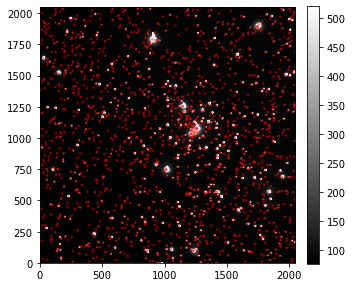

In [23]:
# getting data from a V filter frame
data2 = fits.open('reduced/a159otzf.fits')[0].data

# find all stars in the frame satisfying the fwhm & threshold conditions
mean2, median2, std2 = sigma_clipped_stats(data2, sigma=3.0)

daofind2 = DAOStarFinder(fwhm=7.0, threshold=5.*std2)   

sources2 = daofind2(data2-median2) 

p2 = np.transpose((sources2['xcentroid'],sources2['ycentroid']))

apertures2 = CircularAperture(p2, r=4.)

# displaying to see if fwhm=7 is grabbing enough stars
fig, axes = plt.subplots(1, 1, figsize=(5,5), tight_layout=True)
show_image(data2, cmap='gray', ax=axes, fig=fig)
apertures2.plot(color='red', lw=1.5, alpha=0.5)

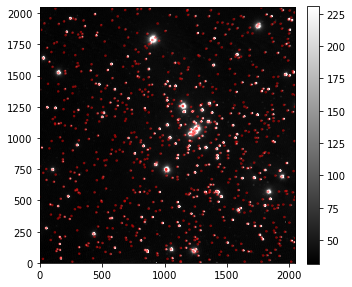

In [24]:
# getting data from a B filter frame
data4 = fits.open('reduced/a160otzf.fits')[0].data

mean4, median4, std4 = sigma_clipped_stats(data4, sigma=3.0)
# using same fwhm as the V filter
daofind4 = DAOStarFinder(fwhm=7.0, threshold=5.*std2)   

sources4 = daofind4(data4-median4) 
p4 = np.transpose((sources4['xcentroid'],sources4['ycentroid']))

apertures4 = CircularAperture(p4, r=4.)

# displaying to see if fwhm=7 is grabbing enough stars
fig, axes = plt.subplots(1, 1, figsize=(5,5), tight_layout=True)
show_image(data4, cmap='gray', ax=axes, fig=fig)
apertures4.plot(color='red', lw=1.5, alpha=0.5)

It's important to remember that the number of stars returned from the V and B filter frames are not the same, and DAOStarFinder does not grab stars in the same order from the V filter frame as it does in the B frame. Therefore, to be able to do the b-v subtraction, we need to cross-match the pixel positions of the stars to make sure we take the difference between the same two stars. 

In [25]:
# cross-matching the pixel positions of the stars
where_4 = []
where_2 = []
for i in range(len(sources2['xcentroid'])):
    wcheck = []
    find = (np.where((np.array(sources4['xcentroid'])<sources2['xcentroid'][i]+5) &
                (np.array(sources4['xcentroid'])>sources2['xcentroid'][i]-5) &
                (np.array(sources4['ycentroid'])<sources2['ycentroid'][i]+5) &
                (np.array(sources4['ycentroid'])>sources2['ycentroid'][i]-5))[0])
    wcheck.append(find)
    # in the rare event that more than 1 match is found for a position, get rid of it
    if len(find)!=0 and len(wcheck[0])<2:
        where_4.append(find)
        where_2.append(i)
idx_4 = [j for j in where_4 if len(j)!=0]
idx_2 = where_2

Doing the atmospheric extinction and instrumental corrections for the stars' magnitudes.

In [26]:
# both frames have the same airmass
airmass = 1.10

# finding the instrumental b-v to use in the instrumental correction
bv = [sources4['mag'][idx_4][i]-sources2['mag'][idx_2][i] for 
      i in range(len(sources2['mag'][idx_2]))]

# correcting for atmospheric extinction using extinction coeffs. in B & V filters 
atm_ext_b = [sources4['mag'][idx_4][i]-avg_k[1]*airmass for 
                 i in range(len(sources4['mag'][idx_4]))]
atm_ext_v = [sources2['mag'][idx_2][i]-avg_k[2]*airmass for 
                 i in range(len(sources2['mag'][idx_2]))]

# using B & V filter zero points and 1st order color terms calculated as functions of B-V 
std_B = []
for i in range(len(sources4['mag'][idx_4])):
    std2 = atm_ext_b[i] + avg_z1[1] + (avg_c1[1])*bv[i]
    std_B.append(std2)
    
std_V = []
for i in range(len(sources2['mag'][idx_2])):
    std3 = atm_ext_v[i] + avg_z1[2] + (avg_c1[2])*bv[i]
    std_V.append(std3)

Now, to correct for dust extinction, we can use the SFD dust maps and the *sfdmap* package to find reddening and the *extinction* package to find rough extinction values. 

In [27]:
from astropy.coordinates import SkyCoord 
import astropy.units as u
import sfdmap
import extinction

dustdir = '../ASTR_8020/ASTR8020/mohammed/week4/sfddata/'
m = sfdmap.SFDMap(dustdir, scaling=1)
# list of ubvri central wavelengths
wave = np.array([3656., 4353., 5477., 6349., 8797.])

# the position of NGC6823
ra, dec = '19h43m09s', '+23d18m00s'
c = SkyCoord(ra, dec)
# obtaining the reddening at this position from the dust maps 
ebv = m.ebv(c.ra.value,c.dec.value)

# using the ccm89 (Cardelli, Clayton, & Mathis (1989)) dust-law
A = extinction.ccm89(wave, 3.1*ebv, 3.1)/(3.1*ebv)

Notice that in finding A, I chose to divide it by A(V)=3.1*ebv in order to match the normalized reddening corrections in the Cardelli, Clayton, & Mathis (1989) paper. That is, the ccm89 dust-law from the extinction package actually returns
$$A(\lambda)=𝐴(𝑉)(a(x)+b(x)/R_V)$$
While the paper normalizes $A(\lambda)$ as
$$A(\lambda)/A(V)=a(x)+b(x)/R_V$$
which is what I'm doing when dividing A by 3.1ebv.

In [28]:
# subtract the extinctions from the standard magnitudes to deredden
corrected_v = std_V-A[2]
corrected_b = std_B-A[1]

# find B-V
BV = [corrected_b[i]-corrected_v[i] for i in range(len(corrected_b))]

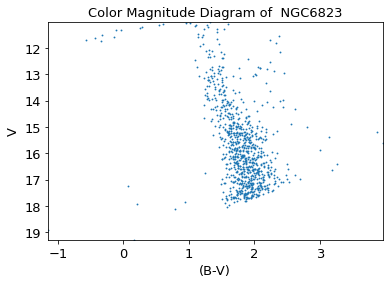

In [29]:
# plotting the CMD for this open cluster.
plt.scatter(BV,corrected_v,s=0.7)
plt.axis([min(BV),max(BV),max(corrected_v),min(corrected_v)])
plt.xlabel('(B-V)',fontsize=13)
plt.ylabel('V',fontsize=13)
plt.title('Color Magnitude Diagram of  NGC6823',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The paper used to compare this CMD to is Rangwal et al. 2017. The general trend in the plot above looks similar to the published CMD, but there are a few major differences. (1) Cluster membership is hard to determine; there's more to consider than just positions (like the ages of the stars). And the method used to gather the stars seen in the plot above does not mask out potential background stars in the science frames, which is probably why there are a few stars scattered about that don't appear in the published CMD. (2) The magnitudes on the axes do not match those of the published diagram. As mentioned in problem 6, this stems from the 
erroneous instrumental magnitudes, which were probably affected by the way I did my bias or overscan subtraction (not flat fielding, since previous tests showed that that step had very little effect on the final outcome).